### Figure 4 of Grund & Ritter (2020) , GJI

This Jupyter Notebook is part of our GJI paper and reproduces **Fig. 4**.

**Note**: since this notebook is a translation from a GMT shell script and some plotting options like roseplots are still in progress for PyGMT, the full figure (including the roseplot etc. shown in the paper) will be available in the near future! Stay tuned ;)

Feel free to modify or play around with the different parameters!

Packages required on your system:

* PyGMT, still under development (see https://www.pygmt.org/dev/overview.html)
* pandas
* numpy

author: M. Grund (2020-07-23)  
updates regarding aliases: YF (2024-06-01)

In [1]:
import pygmt
import numpy as np
import pandas as pd

# define parameters for plotting
pygmt.config(MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
             MAP_ANNOT_OFFSET_PRIMARY = '5p',
             MAP_ANNOT_OFFSET_SECONDARY = '5p',
             MAP_ANNOT_OBLIQUE = '30',
             FONT_ANNOT_PRIMARY = '8p,Helvetica', 
             FONT_LABEL = '8p',
             MAP_FRAME_TYPE = 'fancy',
             MAP_FRAME_WIDTH = '2p',
             MAP_FRAME_PEN = '1.1p',
             MAP_TICK_LENGTH_PRIMARY = '5p',
             MAP_LABEL_OFFSET = '5.5p')

Create a new pygmt figure object.

In [2]:
fig = pygmt.Figure()

Next we define the map content and plot an elevation grid as background using the `grdimage` function.
* Here we can directly access the elevation grid via PyGMT by defining the desired resolution (`'@earth_relief_01m'`, corresponds to ETOPO1 data). Afterwards the required grid of the area is automatically extracted based on the defined region limits (`region = [3.5, 36.5, 54, 71.5]`). The first time you access an elevation grid file it will be downloaded from the GMT server and stored under your GMT user directory. Then the grid file is read from there. For further details see http://gmt.soest.hawaii.edu/doc/latest/datasets.html.
* We use an Albers conic equal-area projection via `projection = 'l20/60/16/80/1:10000000'`.
* The background is colored by using the colormap `gray.cpt` and shading is set to `True`.

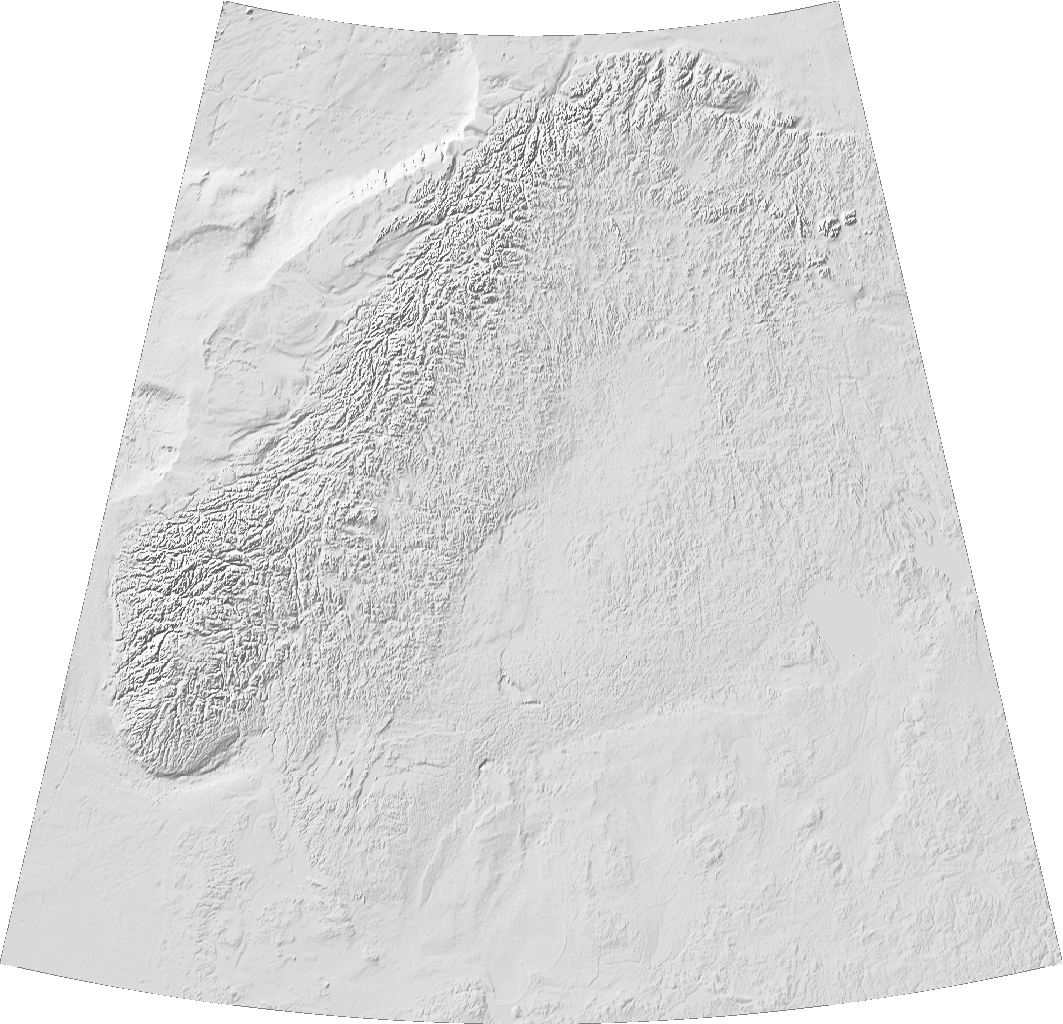

In [3]:
fig.grdimage('@earth_relief_01m',  
             region = [3.5, 36.5, 54, 71.5], 
             projection = 'l20/60/16/80/1:10000000',
             shading = True,
             cmap = 'gray.cpt')

# set the resolution of the figures that are displayed in the notebook below (reduces file size),
# in the end the figure is saved in pdf format in full resolution
dpifig = 150
fig.show(dpi = dpifig)

Now let's use the `coast` function to
* plot high resolution shorelines (`resolution = 'h'`) in black on top (`'1/0.5p,black'`)
* color oceans and water areas in white (`water = 'white'`)
* fill lakes in lightgray via `lakes = 'lightgray'` (so they are not clearly visible)
* add a fancy map frame with annotations every 5°'s in latitude and longitude direction and display these annotations on each axis (`frame = ['x5', 'y5', 'SNEW']`)
* add a map scale in the lower right corner

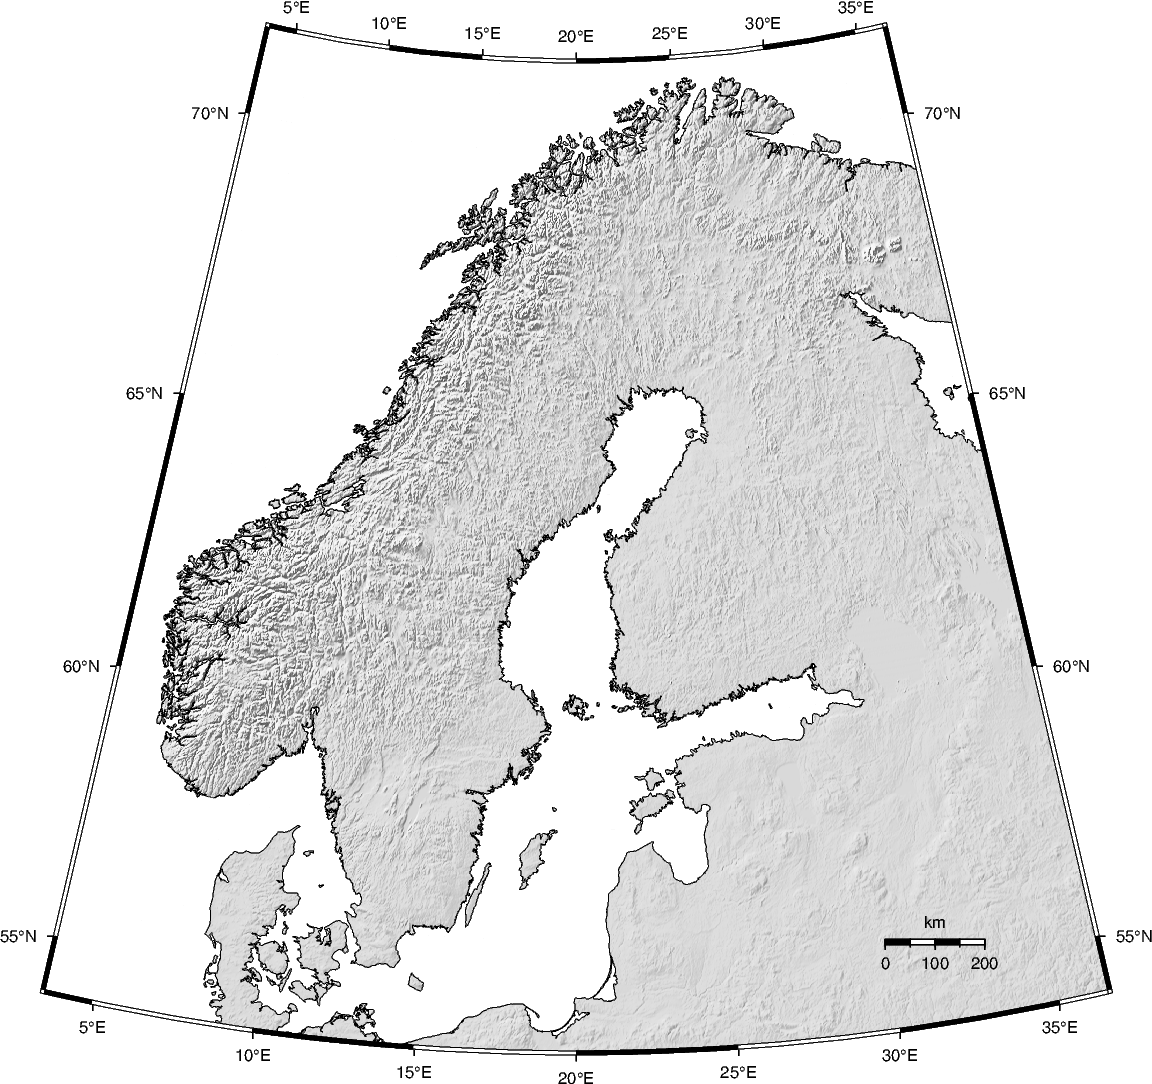

In [4]:
fig.coast(resolution = 'h', 
          shorelines = '1/thinnest,black', 
          water = 'white',
          lakes = 'lightgray', 
          frame = ['x5', 'y5', 'SNEW'],
          area_thresh = ['20/0/1'],
          map_scale = 'f31.5/55.5/56/200+lkm+jt')

fig.show(dpi = dpifig)

Now we add tectonic features like 
* shear zones
* inferred paleo-subduction zones 
* the digitized Tornquist zone

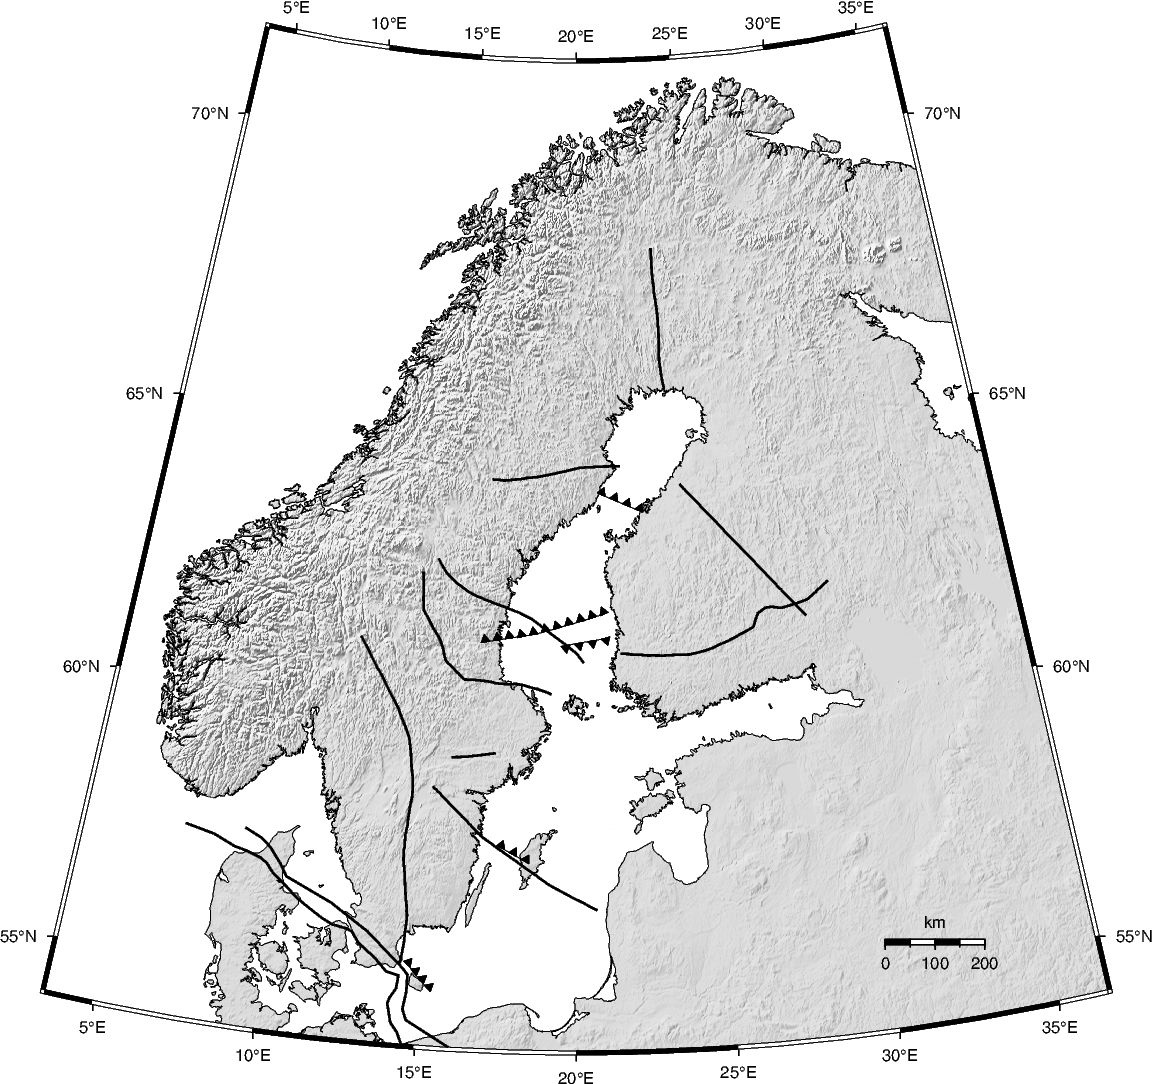

In [5]:
# read in file using pandas
filein2 = 'scan_shear_zones.dat'
namescol2 = ['lon', 'lat', 'name']
datatab2 = pd.read_table(filein2, sep="\s+", skiprows = 5, names = namescol2)

# get single names of individual structures to plot
names = list(set(datatab2['name']))
namescl = [x for x in names if str(x) != 'nan']

for name in namescl: # go through the different names 
    tabfilt21 = datatab2[(datatab2['name'] == name)].copy()
    
    tabfilt21['lon'] = tabfilt21['lon'].astype(float) # convert to float
    lons = tabfilt21['lon']
    lats = tabfilt21['lat']
    
    # first distinguish between shear zones and subduction zones
    if name.startswith('Shear'):
        fig.plot(x = lons, y = lats, pen = '1p,black')
    else:
        
        # now distinguish in which direction ((l)eft or (r)ight) sawtooth pattern should be plotted
        if name.endswith('r'):    
            fig.plot(x = lons, 
                     y = lats, 
                     style = 'f0.2/0.15+t+r', 
                     pen = 'thinnest,black',
                     fill = 'black')
        else:
            fig.plot(x = lons, 
                     y = lats, 
                     style = 'f0.2/0.15+t+l', 
                     pen = 'thinnest,black', 
                     fill = 'black')
                    
# Tornquist Zone, read in file using pandas, we can use the columnnames from above here 
filein3 = 'scan_STZ.dat'
datatab3 = pd.read_table(filein3, sep="\s+", skiprows = 3, names = namescol2)

# get single names of individual structures to plot
names2 = list(set(datatab3['name']))
namescl2 = [x for x in names2 if str(x) != 'nan']  
   
# plot the Tornquist zone 
for name in namescl2:   
    tabfilt31 = datatab3[(datatab3['name'] == name)].copy()
    
    tabfilt31['lon'] = tabfilt31['lon'].astype(float) # convert to float
    lons = tabfilt31['lon']
    lats = tabfilt31['lat']
    
    fig.plot(x = lons, y = lats, pen = '1p,black')            
              
fig.show(dpi = dpifig)

Now we plot first the null stations as green circles using a file in which the plotting order of the indiviudal stations is stored (the file was originally generated in the framework of plotting the individual stereoplots on a map).

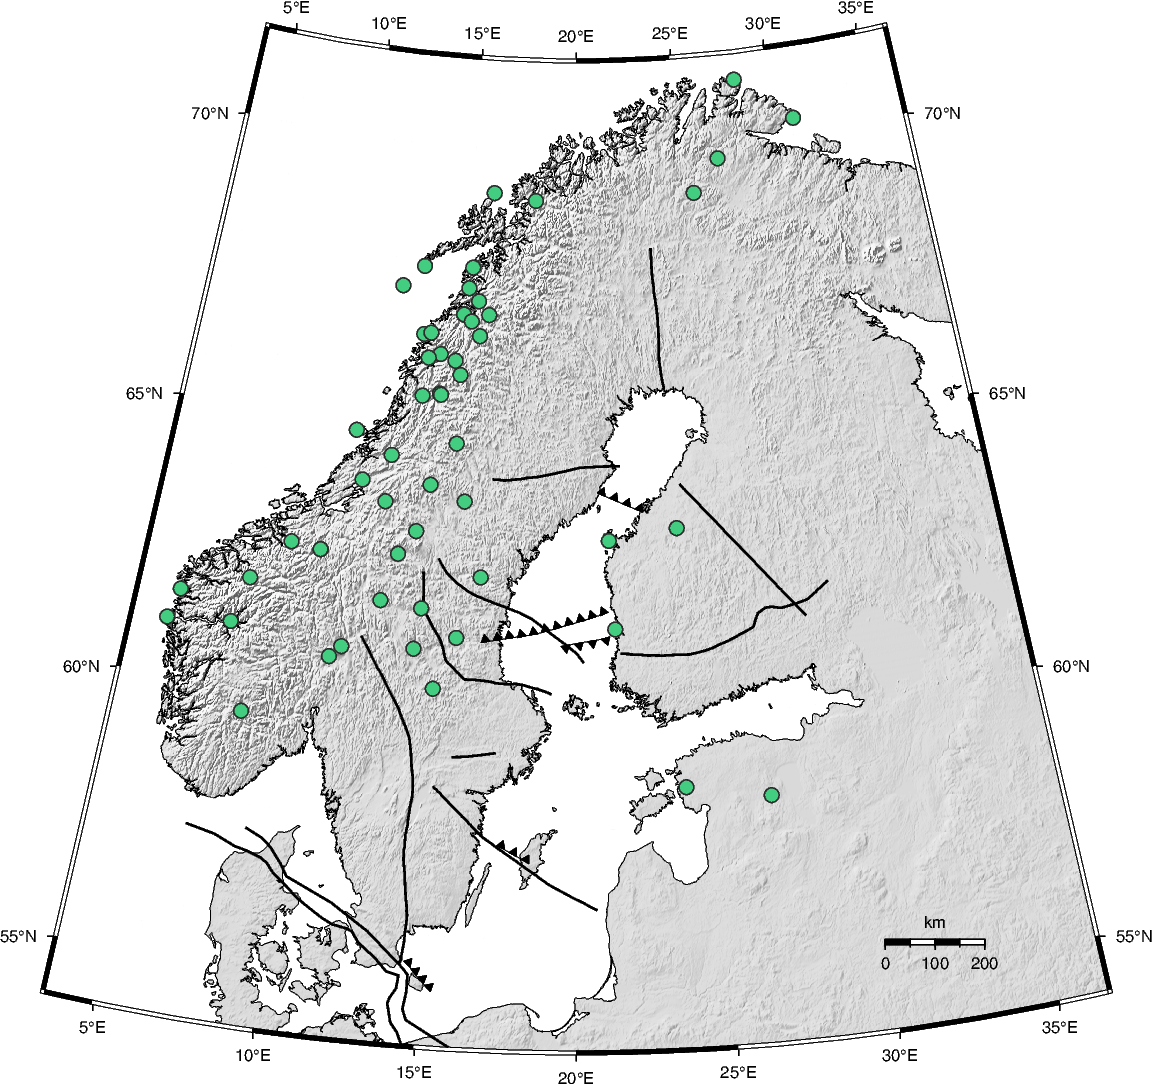

In [6]:
# read in file using pandas
filein = 'results_all_stas_order.dat'
namescol = ['id', 'staname', 'lon', 'lat', 'fname', 'val1', 'val2', 'val3']
datatabori = pd.read_table(filein, 
                         sep="\s+", 
                         names = namescol)

# filter out non-null stations
datatab = datatabori[datatabori['val1'] == 0]

fig.plot(x = datatab['lon'], 
         y = datatab['lat'],
         style = 'c0.25c', 
         pen ='thinner,44/44/44', 
         fill = 'seagreen3')

fig.show(dpi = dpifig)

Do some processing on the input file which contains the splitting results. 

**Please note**: the delay times were previously multiplied by a factor of **60** and thus the values given in the input file are much larger than the typical range of delay times. However, this was only done for plotting reasons.

In [7]:
# read in file using pandas
filein = 'results_split_gf.dat'
namescol = ['lon', 'lat', 'phi', 'thick', 'dt']
datatab = pd.read_table(filein, 
                         sep="\s+", 
                         names = namescol)

# rearange column order
cols = datatab.columns.tolist()
cols = cols[0:3] + cols[4:5] + cols[3:4]
datatab = datatab[cols]
datatab.to_csv('results_split_gf_mod.dat', # write to new file
              sep = ' ',
              index = False,
              header = False)

datatab.head()

lon     lat  phi  dt  thick
0  19.9936  60.178   84  36    5.6
1  19.9936  60.178  -77  42    5.6
2  19.9936  60.178   75  24    5.6
3  19.9936  60.178   64  48    5.6
4  19.9936  60.178   88  42    5.6

Now we plot the different splitting measurements as red bars and add black dots to the locations of all stations.

In [ ]:
# using rotated rectangles color-coded by the source regions (based on the colorwheel)
bar_edgecol = '44/44/44'
fig.plot(data = 'results_split_gf_mod.dat', 
         style = 'J', 
         pen ='0.55p,' + bar_edgecol, 
         fill = 'red')

# plot black dots on the locations of all stations, for this we use the dataframe created above 
# before filtering (which contains all analyzed stations)
fig.plot(x = datatabori['lon'], 
         y = datatabori['lat'],
         style = 'c0.08c', 
         pen ='thinner,44/44/44', 
         fill = 'black')

fig.show(dpi = dpifig)

Finally, we plot the area boundaries (in blue color) for which the results are shown in a separate histogram plot (Fig. 5 of the paper).

In [ ]:
colbounds = '61.6095/76.2448/138.2549'
transpbounds = '10' # transparency

# south Norway
data = np.array([[4, 57.6],
                [4, 61.9],
                [10.3, 61.9],
                [10.3, 57.6],
                [4, 57.6]])

fig.plot(data = data,
         pen = '0.085c,' + colbounds,
         transparency = transpbounds)  

# south Finland
data = np.array([[20.6, 59.9],
                [20.6, 63.5],
                [32.5, 63.5],
                [32.5, 59.9],
                [20.6, 59.9]])

fig.plot(data = data,
         pen = '0.085c,' + colbounds,
         transparency = transpbounds) 

# central Norway
data = np.array([[11, 64.5],
                [11, 69.5],
                [23, 69.5],
                [23, 64.5],
                [11, 64.5]])

fig.plot(data = data,
         pen = '0.085c,' + colbounds,
         transparency = transpbounds) 

# add annotations to boxes
fig.text(y = [69.8, 57.3, 64.3], 
         x = [8.5, 4.5, 32.3], 
         text = ['A','B','C'], 
         font = '16p,Helvetica,' + colbounds, 
         fill = 'white',
         offset = '0.25/-0.25',
         clearance = '0.03i/0.03i')

fig.show(dpi = dpifig)

Save the figure in pdf format.

In [ ]:
fig.savefig('PLOT_fig4.pdf', dpi = 300)